# Bayesovská Analýza Poissonova Rozdělení
## Část první: Konjugované apriorní a aposteriorní rozdělení, prediktivní rozdělení
---
Nejdříve načteme knihovny a data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, gamma, truncnorm

# Replace this with the path to your data file
data_file_path = '../data/data_1.csv'

# Load data
data = pd.read_csv(data_file_path)
# Ensure correct column is used, adjust the column name if necessary
observations = data['uloha_1 a)']
observations = observations[~np.isnan(observations)].astype(int)
observations

0     2
1     2
2     1
3     3
4     0
     ..
95    3
96    0
97    3
98    1
99    1
Name: uloha_1 a), Length: 100, dtype: int64

### Bayesovská analýza parametru lambdaPoissonova rozdělení


> Do jednoho obrázku vykreslíte apriorní a aposteriorní hustotou parametru Poissonova
rozdělení lambda.

---

**Apriorní rozdělení:**
- Expertní odhad: Průměr 10 připojení za 5 ms, což implikuje lambda = 2 připojení/ms.
- Konjugované apriorní rozdělení: Gamma rozdělení (konjugované k Poissonovu) s parametry alpha = 2, beta = 1.

**Aposteriorní rozdělení:**
- Bayesovská aktualizace: Úprava Gamma rozdělení na základě dat.
- Aktualizované parametry: 
  - alpha_posterior = alpha_prior + sum(x_i) (součet pozorování)
  - beta_posterior = beta_prior + n (počet pozorování)

**Vykreslení:**
- Apriorní a aposteriorní hustoty lamba jsou vykresleny pro srovnání dopadu pozorovaných dat na odhad parametru.


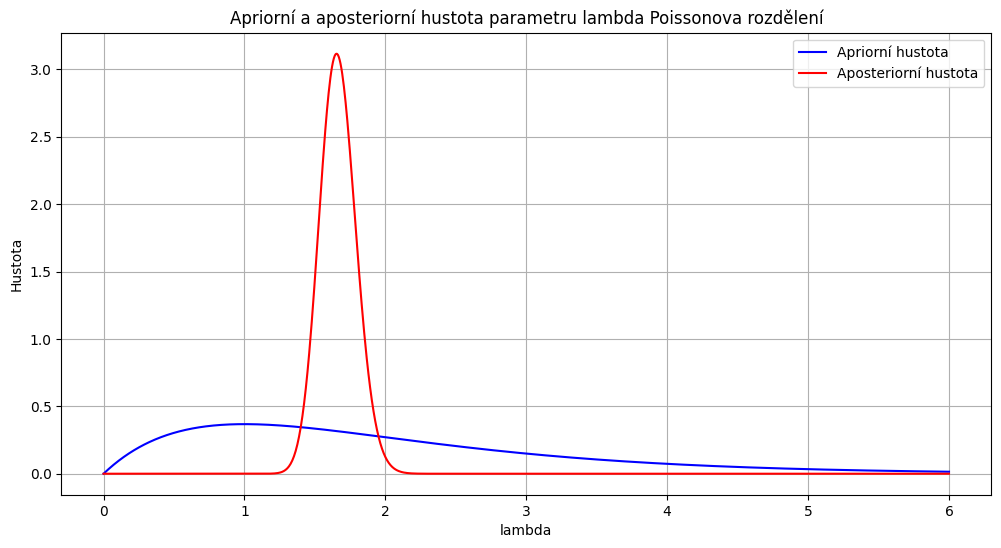

In [2]:
# Apriori distribution parameters
alpha_prior = 2
beta_prior = 1

# Calculate the parameters for the aposteriori distribution
alpha_posterior = alpha_prior + observations.sum()
beta_posterior = beta_prior + len(observations)

# Values over which to calculate the densities
lambda_values = np.linspace(0, 6, 1000)

# Calculate the densities
apriori_densities = gamma.pdf(lambda_values, a=alpha_prior, scale=1/beta_prior)
aposteriori_densities = gamma.pdf(lambda_values, a=alpha_posterior, scale=1/beta_posterior)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(lambda_values, apriori_densities, label='Apriorní hustota', color='blue')
plt.plot(lambda_values, aposteriori_densities, label='Aposteriorní hustota', color='red')
plt.title('Apriorní a aposteriorní hustota parametru lambda Poissonova rozdělení')
plt.xlabel('lambda')
plt.ylabel('Hustota')
plt.legend()
plt.grid()
plt.show()

### Prediktivní Hustoty Pozorování Poissonova Rozdělení

> Do jednoho obrázku vykreslíte apriorní a aposteriorní prediktivní hustotou pozorovaní
x za jeden časový interval.

---

**Metoda:**
- Apriorní prediktivní hustota je založena na průměru apriorního Gamma rozdělení.
- Aposteriorní prediktivní hustota využívá průměr aposteriorního Gamma rozdělení.
- Obě hustoty jsou vypočítány pomocí Poissonova rozdělení a jsou vykresleny pro srovnání.

Prediktivní hustoty poskytují přehled o tom, jak pozorovaná data ovlivňují naše očekávání ohledně budoucích pozorování.


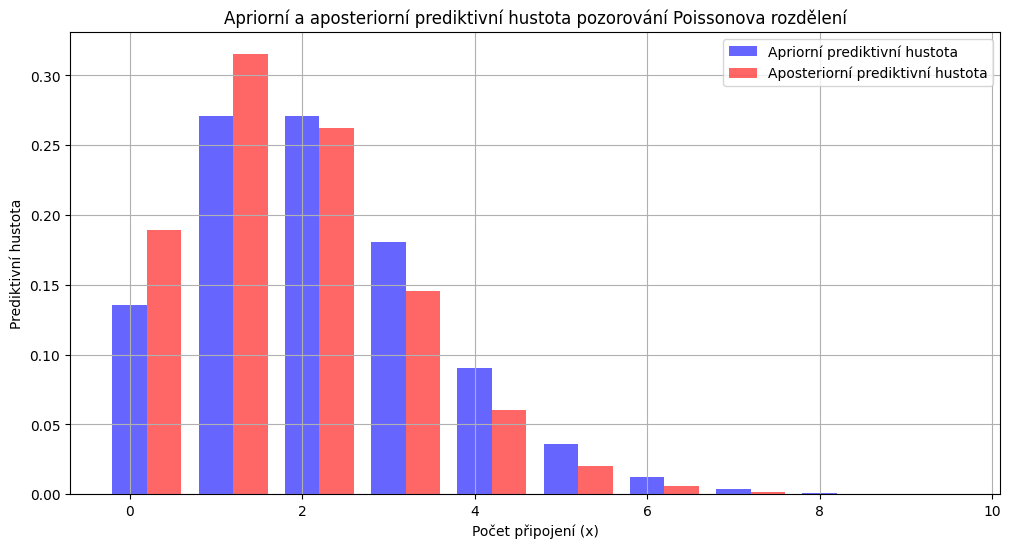

In [3]:
# Compute the mean of the apriori and aposteriori Gamma distributions
lambda_apriori_mean = alpha_prior / beta_prior
lambda_aposteriori_mean = alpha_posterior / beta_posterior

# Define range of x values (possible number of connections)
x_values = np.arange(0, 10)

# Calculate the predictive densities
apriori_predictive_density = poisson.pmf(x_values, lambda_apriori_mean)
aposteriori_predictive_density = poisson.pmf(x_values, lambda_aposteriori_mean)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(x_values, apriori_predictive_density, width=0.4, label='Apriorní prediktivní hustota', alpha=0.6, align='center', color='blue')
plt.bar(x_values + 0.4, aposteriori_predictive_density, width=0.4, label='Aposteriorní prediktivní hustota', alpha=0.6, align='center', color='red')
plt.title('Apriorní a aposteriorní prediktivní hustota pozorování Poissonova rozdělení')
plt.xlabel('Počet připojení (x)')
plt.ylabel('Prediktivní hustota')
plt.legend()
plt.grid()
plt.show()


### 95% Interval Spolehlivosti pro Parametr lambda

> Sestrojte 95% interval spolehlivosti pro parametr lambda z apriorního a aposteriorního
rozdělení a porovnejte je.
---

**Metoda:**
- Interval spolehlivosti pro Gamma rozdělení se vypočítá pomocí jeho kumulativní distribuční funkce (CDF).
- Pro obě rozdělení nalezneme hodnoty lambda, kde CDF Gamma rozdělení dosahuje hodnot 0.025 a 0.975.

**Porovnání:**
- Intervaly poskytují vhled do toho, jak pozorovaná data mění naši nejistotu ohledně parametru lambda.


In [4]:

# Calculate the 95% confidence interval for the apriori distribution
lower_bound_apriori = gamma.ppf(0.025, a=alpha_prior, scale=1/beta_prior)
upper_bound_apriori = gamma.ppf(0.975, a=alpha_prior, scale=1/beta_prior)

# Calculate the 95% confidence interval for the aposteriori distribution
lower_bound_aposteriori = gamma.ppf(0.025, a=alpha_posterior, scale=1/beta_posterior)
upper_bound_aposteriori = gamma.ppf(0.975, a=alpha_posterior, scale=1/beta_posterior)

# Print the results
print(f"95% Interval spolehlivosti pro apriorní rozdělení: ({lower_bound_apriori}, {upper_bound_apriori})")
print(f"95% Interval spolehlivosti pro aposteriorní rozdědlení: ({lower_bound_aposteriori}, {upper_bound_aposteriori})")


95% Interval spolehlivosti pro apriorní rozdělení: (0.24220927854396496, 5.571643390938898)
95% Interval spolehlivosti pro aposteriorní rozdědlení: (1.4213461513304455, 1.9241339817546559)


### Bodové Odhady Parametru lambda

> Vyberte si dva aposteriorní bodové odhady parametru lambda, porovnejte je a okomentujte
jejich výběr.
 
---

**Výběr Odhadů:**
- **Průměr**: Průměr Gamma rozdělení je alfa/beta. Pro aposteriorní rozdělení je to alfa_posterior/beta_posterior.
- **Medián**: Medián Gamma rozdělení získáme pomocí kumulativní distribuční funkce (CDF), jako hodnotu lambda, kde CDF dosahuje 0.5.

**Porovnání:**
- Porovnáním těchto dvou odhadů získáme lepší pochopení různých aspektů rozdělení. Průměr odráží střední tendenci, zatímco medián je odolnější vůči extrémním hodnotám.



In [11]:
# Mean of the aposteriori distribution
mean_aposteriori = alpha_posterior / beta_posterior

# Median of the aposteriori distribution
median_aposteriori = gamma.ppf(0.5, a=alpha_posterior, scale=1/beta_posterior)

# Print the results
print("Aposteriorní střední hodnota: {}".format(mean_aposteriori))
print("Aposteriorní medián: {}".format(median_aposteriori))


Aposteriorní střední hodnota: 1.6633663366336633
Aposteriorní medián: 1.6600671732693628


### Bodové Odhady Počtu Pozorování

> Vyberte si jeden apriorní a jeden aposteriorní bodový odhad počtu pozorovaní a
porovnejte je.
---
**Výběr Odhadů:**
- **Apriorní Odhad**: Průměr Poissonova rozdělení pro apriorní odhad. Je to stejné jako průměr apriorního Gamma rozdělení, tedy alfa_prior/beta_prior.
- **Aposteriorní Odhad**: Průměr Poissonova rozdělení pro aposteriorní odhad, což je alfa_posterior/beta_posterior.

**Porovnání:**
- Tyto odhady odrážejí očekávaný počet připojení za 1 ms před a po pozorování dat. Rozdíl mezi odhady poskytuje přehled o dopadu pozorovaných dat na naše očekávání.


In [6]:
# Apriori point estimate (mean of the apriori Gamma distribution)
apriori_point_estimate = alpha_prior / beta_prior

# Aposteriori point estimate (mean of the aposteriori Gamma distribution)
aposteriori_point_estimate = alpha_posterior / beta_posterior

# Print the results
print(f"Apriorní bodový odhad: {apriori_point_estimate}")
print(f"Aposteriorní bodový odhad: {aposteriori_point_estimate}")


Apriorní bodový odhad: 2.0
Aposteriorní bodový odhad: 1.6633663366336633


## Část druhá: Aproximace diskrétním rozdělením
---
Nejdříve načteme data do dataframe.

In [7]:


# Load the data from the excel file
file_path = '../data/Projekt-2_Data.xlsx'  # Update this path
data = pd.read_excel(file_path, sheet_name='Úloha 1')

# Define the columns
prior_column = 'uloha_1 b)_prior'
likelihood_column = 'uloha_1 b)_pozorování'
groups_column = 'skupina'

Apriori Data Sample:
 0    3.634785
1    2.868113
2    2.149160
3    4.263065
4    2.594745
Name: uloha_1 b)_prior, dtype: float64

Group Data Sample:
 0    0
1    0
2    0
3    0
4    0
Name: skupina, dtype: int64

Observations Data Sample:
 0    3.626656
1    3.008269
2    2.989829
3    2.371630
4    4.009366
Name: uloha_1 b)_pozorování, dtype: float64


### Vizualizace Apriorní, Aposteriorní Distribuce a Funkce Věrohodnosti

> Do jednoho grafu vykreslíte apriorní, aposteriorní hustotou a funkci věrohodnosti.
Funkci věrohodnosti normujte tak, aby jej součet byl 1 kvůli porovnatelnosti
v obrázku.

---

**Postup:**
1. **Apriorní Distribuce**: Předpokládáme, že historické záznamy v sloupci "uloha_1 b)_prior" reprezentují apriorní distribuci parametru b.
2. **Funkce Věrohodnosti**: Odvodíme z pozorování v sloupci "uloha_1 b)_pozorovania". Vypočítáme pravděpodobnosti pro každou pozorovanou hodnotu a normalizujeme.
3. **Aposteriorní Distribuce**: Kombinuje apriorní distribuci a normalizovanou funkci věrohodnosti. Vypočítává se pomocí Bayesova teorému.
4. **Vykreslení**: Apriorní distribuce, normalizovaná funkce věrohodnosti a aposteriorní distribuce jsou zobrazeny v jednom grafu.

Graf poskytuje vizuální porovnání vlivu pozorovaných dat na apriorní předpoklady o parametru b.


0.08767990667769254 0.08767990667769254 0.08767990667769254
1.0000000000000002 1.0000000000000002 1.0


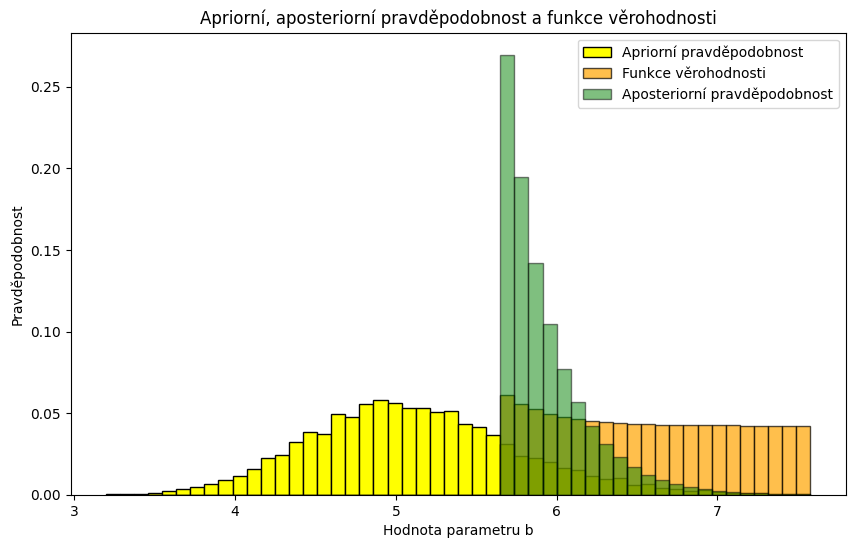

In [49]:
# Group and get max values for each group
grouped_max_values = data.groupby(groups_column)[prior_column].max()

# Define the number of bins and calculate bin edges and centers
num_bins = 50
bin_edges = np.linspace(grouped_max_values.min(), grouped_max_values.max(), num_bins + 1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Histogram for the prior distribution
binned_counts, _ = np.histogram(grouped_max_values, bins=bin_edges)
binned_pmf = binned_counts / binned_counts.sum()

# Parameters for the truncated normal distribution
mu = 3
sigma = 1
a = 1
b = np.inf

likelihood_data = data[likelihood_column].dropna()
prior_densities = []
likelihood_densities = []
posterior_densities = []

for b_value in bin_centers:
    temp_truncnorm = truncnorm((a - mu) / sigma, (b_value - mu) / sigma, loc=mu, scale=sigma)
    
    prior_density = temp_truncnorm.pdf(b_value)
    prior_densities.append(prior_density)
    
    likelihood = np.prod(temp_truncnorm.pdf(likelihood_data))
    likelihood_densities.append(likelihood)
    
    posterior_density = prior_density * likelihood
    posterior_densities.append(posterior_density)

normalized_likelihood = np.array(likelihood_densities) / np.sum(likelihood_densities)
normalized_posterior = np.array(posterior_densities) / np.sum(posterior_densities)

plt.figure(figsize=(10, 6))
plt.bar(bin_centers, binned_pmf, width=bin_centers[1] - bin_centers[0], color='yellow', label='Apriorní pravděpodobnost', edgecolor='black')
plt.bar(bin_centers, normalized_likelihood, width=bin_centers[1] - bin_centers[0], color='orange', alpha=0.7, label='Funkce věrohodnosti', edgecolor='black')
plt.bar(bin_centers, normalized_posterior, width=bin_centers[1] - bin_centers[0], color='green', alpha=0.5, label='Aposteriorní pravděpodobnost', edgecolor='black')
plt.xlabel('Hodnota parametru b')
plt.ylabel('Pravděpodobnost')
plt.title('Apriorní, aposteriorní pravděpodobnost a funkce věrohodnosti')
plt.legend()
plt.show()

print(np.sum(normalized_likelihood), np.sum(normalized_posterior), np.sum(binned_pmf))


### 95% Interval Spolehlivosti pro Parametr b

>Z aposteriorní hustoty určete 95% interval spolehlivosti (konfidenční interval) pro
parametr b.

---

**Postup:**
1. **Výpočet Aposteriorní Hustoty**: Použití dříve vypočítané aposteriorní distribuce.
2. **Určení 95% CI**: Nalezení hodnot b, pro které kumulativní suma aposteriorní hustoty dosahuje hodnot 0.025 a 0.975.

Výsledkem je interval, který s 95% pravděpodobností obsahuje skutečnou hodnotu parametru b.


In [38]:
posterior_cdf = np.cumsum(normalized_posterior)

lower_bound_idx = np.where(posterior_cdf >= 0.025)[0][0]
upper_bound_idx = np.where(posterior_cdf >= 0.975)[0][0]

CI_lower = bin_centers[lower_bound_idx]
CI_upper = bin_centers[upper_bound_idx]

print(f"95% interval spolehlivosti pro parametr b: ({CI_lower}; {CI_upper})")


95% interval spolehlivosti pro parametr b: (5.693712028182375; 6.658191001636995)


### Bodové Odhady Parametru b

>Vyberte dva bodové odhady parametru b a spočítejte je.

---

**Postup:**
1. **Průměr**: Výpočet průměru aposteriorní distribuce, což je očekávaná hodnota b.
2. **Modus**: Nalezení modusu aposteriorní distribuce, který odpovídá hodnotě b v nejvyšším bodě distribuce.

Výsledkem jsou dva různé odhady parametru b, každý poskytující odlišný pohled na distribuci tohoto parametru.


In [39]:
posterior_mean = np.sum(bin_centers * normalized_posterior)

mode_index = np.argmax(normalized_posterior)
posterior_mode = bin_centers[mode_index]

print(f"Střední hodnota pro b: {posterior_mean}")
print(f"Modus pro b: {posterior_mode}")


Střední hodnota pro b: 5.931013957013809
Modus pro b: 5.693712028182375
